# Analisi dei post della pagina Facebook del MIBACT.
# 17 febbraio al 17 maggio 2016

In [1]:
import sys
import pprint
pprint.pprint(sys.path)

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
%matplotlib inline
plt.style.use('ggplot')

['',
 '/home/inmediaref/anaconda3/lib/python35.zip',
 '/home/inmediaref/anaconda3/lib/python3.5',
 '/home/inmediaref/anaconda3/lib/python3.5/plat-linux',
 '/home/inmediaref/anaconda3/lib/python3.5/lib-dynload',
 '/home/inmediaref/anaconda3/lib/python3.5/site-packages/Sphinx-1.3.5-py3.5.egg',
 '/home/inmediaref/anaconda3/lib/python3.5/site-packages/setuptools-20.3-py3.5.egg',
 '/home/inmediaref/anaconda3/lib/python3.5/site-packages',
 '/home/inmediaref/anaconda3/lib/python3.5/site-packages/IPython/extensions',
 '/home/inmediaref/.ipython']


In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints size
print("Current size:", fig_size)

# Set figure width
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size


Current size: [6.0, 4.0]


In [3]:
mib_fb = pd.read_csv('https://raw.githubusercontent.com/marcogoldin/data_science/master/mibact_facebook/mibact_facebook_feb_mag_2016.csv',
                     sep=';')

In [4]:
mib_fb.describe()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
count,213.000000,2.130000e+02,213.000000,213.000000,213.000000,213.00000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,107.000000,1.459499e+09,726.413146,731.746479,20.760563,20.56338,15.859155,4.704225,261.544601,16.751174,1025.272300
std,61.631972,2.162119e+06,591.751452,595.717572,26.140115,25.92409,19.680200,8.234295,368.887138,28.384640,949.021259
min,1.000000,1.455703e+09,17.000000,17.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,54.000000,1.457628e+09,283.000000,287.000000,5.000000,5.00000,4.000000,0.000000,27.000000,1.000000,353.000000
50%,107.000000,1.459443e+09,613.000000,616.000000,13.000000,13.00000,10.000000,2.000000,165.000000,7.000000,803.000000
75%,160.000000,1.461265e+09,997.000000,1009.000000,27.000000,27.00000,21.000000,6.000000,326.000000,19.000000,1397.000000
max,213.000000,1.463473e+09,2980.000000,2997.000000,201.000000,200.00000,147.000000,61.000000,2488.000000,206.000000,5638.000000


In [5]:
mib_fb.corr()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,1.000000,-0.999127,0.033839,0.035381,0.016952,0.017501,0.027277,-0.010094,0.107086,0.051667,0.064748
post_published_unix,-0.999127,1.000000,-0.033097,-0.034650,-0.020441,-0.020955,-0.030516,0.006961,-0.109657,-0.053595,-0.065437
likes,0.033839,-0.033097,1.000000,0.999989,0.647661,0.647439,0.649203,0.486725,0.788388,0.596614,0.965517
likes_count_fb,0.035381,-0.034650,0.999989,1.000000,0.647592,0.647361,0.649048,0.486848,0.788916,0.596618,0.965714
comments_count_fb,0.016952,-0.020441,0.647661,0.647592,1.000000,0.999813,0.970484,0.828232,0.676019,0.822288,0.718518
comments_all,0.017501,-0.020955,0.647439,0.647361,0.999813,1.000000,0.971758,0.825777,0.675958,0.822015,0.718353
comments_base,0.027277,-0.030516,0.649203,0.649048,0.970484,0.971758,1.000000,0.669365,0.666178,0.829946,0.715117
comments_replies,-0.010094,0.006961,0.486725,0.486848,0.828232,0.825777,0.669365,1.000000,0.535940,0.604363,0.552446
shares,0.107086,-0.109657,0.788388,0.788916,0.676019,0.675958,0.666178,0.535940,1.000000,0.700899,0.919721
comment_likes,0.051667,-0.053595,0.596614,0.596618,0.822288,0.822015,0.829946,0.604363,0.700899,1.000000,0.696817


In [6]:
mib_fb.cov()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,3.798500e+03,-1.331393e+08,1.234118e+03,1.299028e+03,2.731132e+01,2.796226e+01,3.308491e+01,-5.122642,2.434627e+03,9.038679e+01,3.787094e+03
post_published_unix,-1.331393e+08,4.674757e+12,-4.234614e+07,-4.462929e+07,-1.155272e+06,-1.174546e+06,-1.298479e+06,123932.197582,-8.745977e+07,-3.289194e+06,-1.342697e+08
likes,1.234118e+03,-4.234614e+07,3.501698e+05,3.525130e+05,1.001831e+04,9.932120e+03,7.560478e+03,2371.641642,1.720968e+05,1.002111e+04,5.422198e+05
likes_count_fb,1.299028e+03,-4.462929e+07,3.525130e+05,3.548794e+05,1.008438e+04,9.997478e+03,7.609337e+03,2388.141642,1.733662e+05,1.008835e+04,5.459650e+05
comments_count_fb,2.731132e+01,-1.155272e+06,1.001831e+04,1.008438e+04,6.833056e+02,6.775318e+02,4.992586e+02,178.273186,6.518688e+03,6.101194e+02,1.782465e+04
comments_all,2.796226e+01,-1.174546e+06,9.932120e+03,9.997478e+03,6.775318e+02,6.720585e+02,4.957826e+02,176.275910,6.464229e+03,6.048767e+02,1.767328e+04
comments_base,3.308491e+01,-1.298479e+06,7.560478e+03,7.609337e+03,4.992586e+02,4.957826e+02,3.873103e+02,108.472296,4.836299e+03,4.636204e+02,1.335618e+04
comments_replies,-5.122642e+00,1.239322e+05,2.371642e+03,2.388142e+03,1.782732e+02,1.762759e+02,1.084723e+02,67.803614,1.627931e+03,1.412562e+02,4.317105e+03
shares,2.434627e+03,-8.745977e+07,1.720968e+05,1.733662e+05,6.518688e+03,6.464229e+03,4.836299e+03,1627.930707,1.360777e+05,7.338924e+03,3.219777e+05
comment_likes,9.038679e+01,-3.289194e+06,1.002111e+04,1.008835e+04,6.101194e+02,6.048767e+02,4.636204e+02,141.256245,7.338924e+03,8.056878e+02,1.877060e+04


In [7]:
mib_fb[['likes','shares']].corr()

,likes,shares
likes,1.000000,0.788388
shares,0.788388,1.000000


# Esploriamo a fondo l'intero dataset

In [8]:
mib_fb.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

### **Una prima ispezione dei valori numerici (likes, condivisioni, commenti, etc...) rivela pressoché ovunque la presenza di outliers, valori anomali ampiamente fuori dal primo e terzo quartile che potrebbero compromettere l'analisi.**

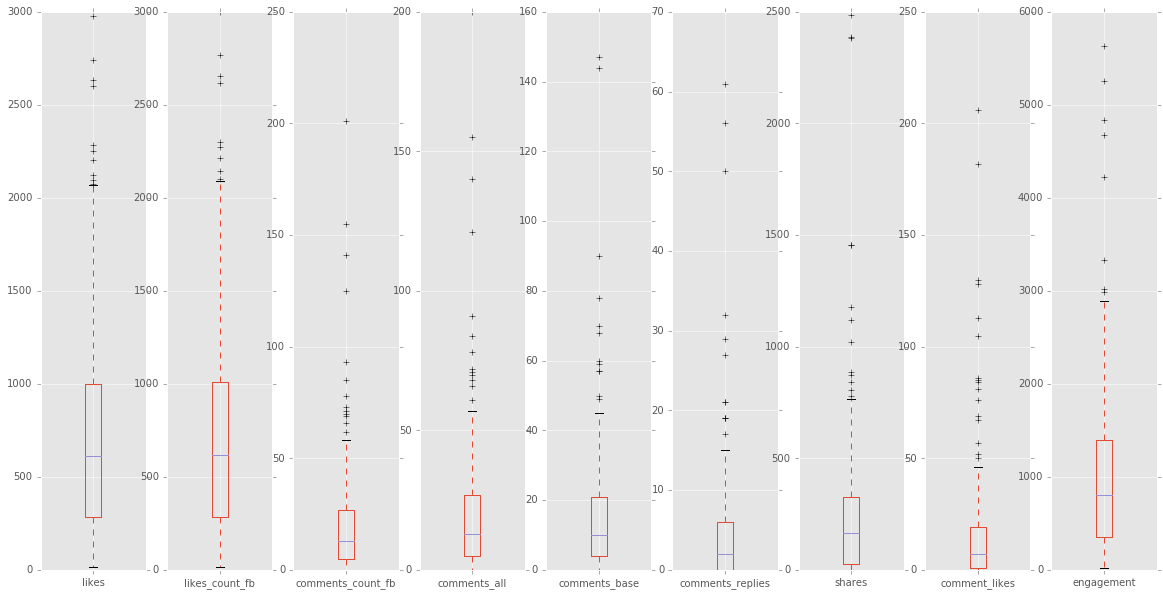

In [9]:
boxplots = mib_fb[mib_fb.columns[10:]].plot(subplots=True, kind='box', figsize=(20,10))


### Prendiamo come esempio la colonna con i valori di "engagement" per i singoli post del campione

- **Engagement**

In [10]:
engage = mib_fb['engagement']

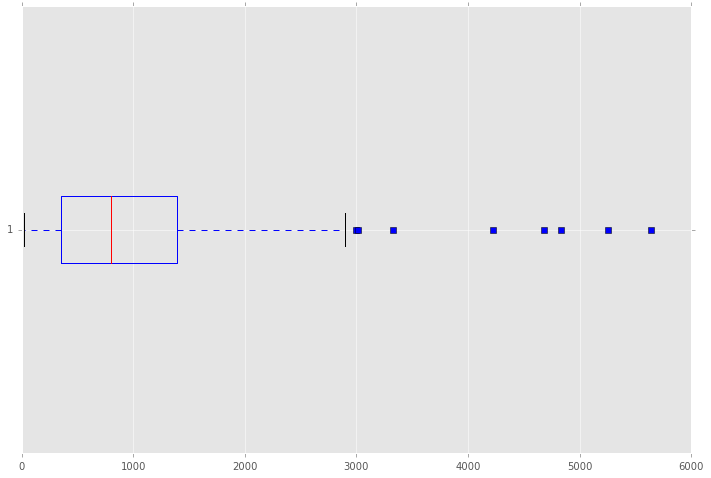

In [11]:
engage_boxplt = plt.boxplot(engage, 0, 'rs', 0)

**Il boxplot evidenzia un gran numero di outliers nei dati di engagement**

**E evidente che NON siamo in presenza di una "distribuzione normale"**

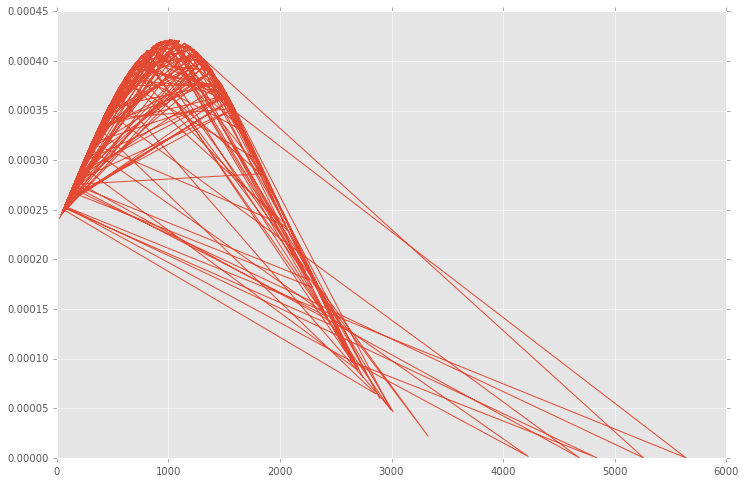

In [12]:
mib_fb_media = np.mean(engage)
mib_fb_std = np.std(engage)
pdf = stats.norm.pdf(engage, mib_fb_media, mib_fb_std)
plt.plot(engage, pdf)

# O anche...

(array([ 82.,  54.,  46.,  12.,   9.,   5.,   0.,   1.,   2.,   2.]),
 array([   25. ,   586.3,  1147.6,  1708.9,  2270.2,  2831.5,  3392.8,
         3954.1,  4515.4,  5076.7,  5638. ]),
 <a list of 10 Patch objects>)

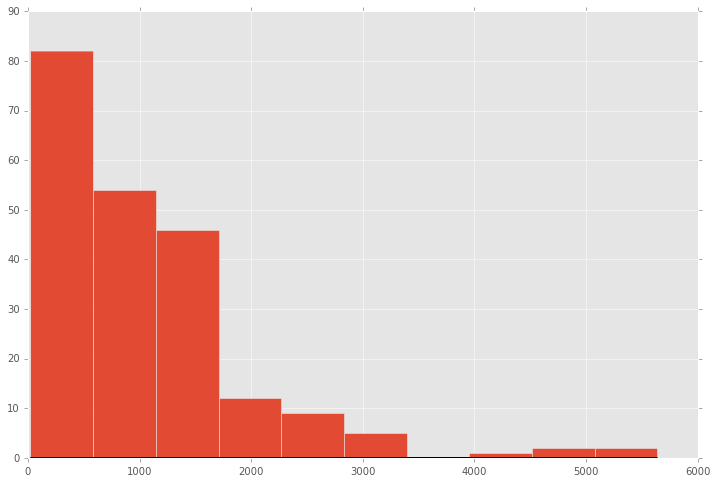

In [13]:
engage_norm = stats.norm.pdf(engage, np.mean(engage), np.std(engage))

plt.plot(engage, engage_norm, '-0')

plt.hist(engage)

**No, decisamente una distribuzione "non normale"**

In [14]:
engage.mean()

1025.2723004694835

In [15]:
engage.std()

949.0212589984502

In [16]:
engage.median()

803.0

# E normalizzando i dati con una trasformazione logaritmica?

(array([  3.,   9.,  15.,  12.,  17.,  32.,  47.,  53.,  19.,   6.]),
 array([ 3.21887582,  3.76071671,  4.30255759,  4.84439848,  5.38623936,
         5.92808025,  6.46992113,  7.01176202,  7.5536029 ,  8.09544379,
         8.63728467]),
 <a list of 10 Patch objects>)

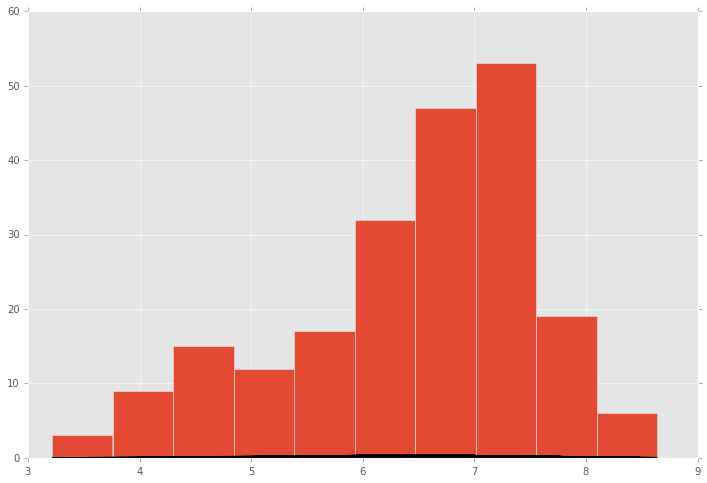

In [17]:
engage_log = np.log(mib_fb['engagement'])

engage_log_new = stats.norm.pdf(engage_log, np.mean(engage_log), np.std(engage_log))

plt.plot(engage_log, engage_log_new, '-0')

plt.hist(engage_log)

**Meglio, mal risultato è comunque caratterizzato da una asimmetria fortemente negativa.
E' la classica situazione in cui la distribuzione presenta pochi dati con forti scarti negativi bilanciati da molti dati con deboli scarti positivi.**

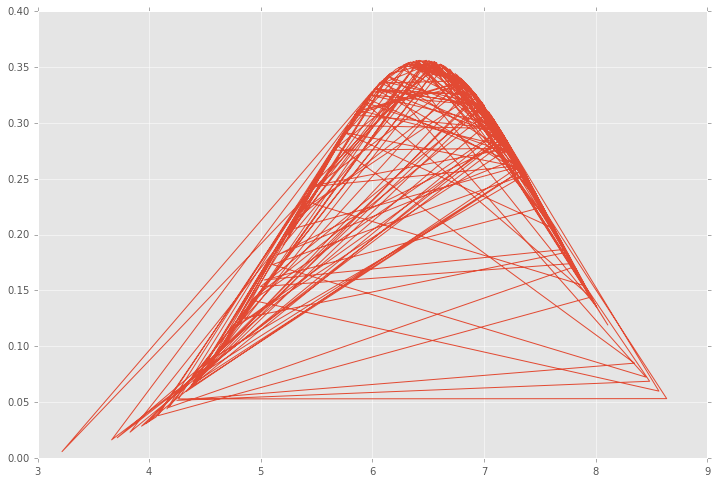

In [18]:

linea = stats.norm.pdf(engage_log, np.mean(engage_log), np.std(engage_log))
plt.plot(engage_log, linea)

# Post e timing

In [19]:
from datetime import datetime
from datetime import timedelta

In [20]:
mib_fb.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

### Andamento dei likes

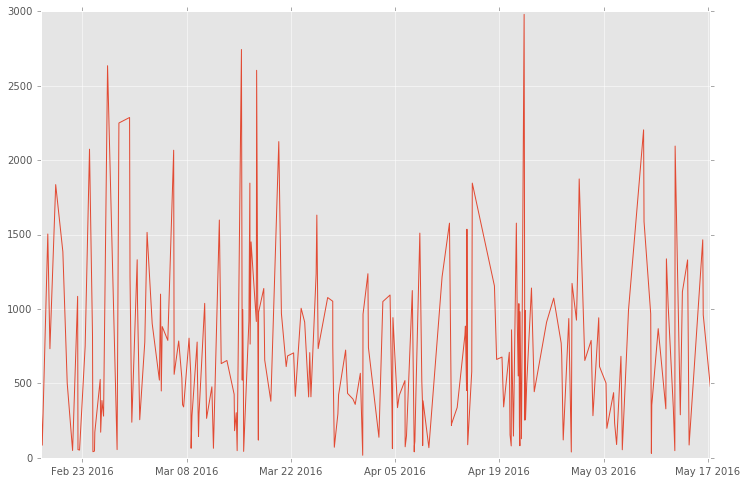

In [69]:
mibx = pd.to_datetime(mib_fb['post_published'])
miby = mib_fb['likes']
plt.plot(mibx,miby)
plt.show()

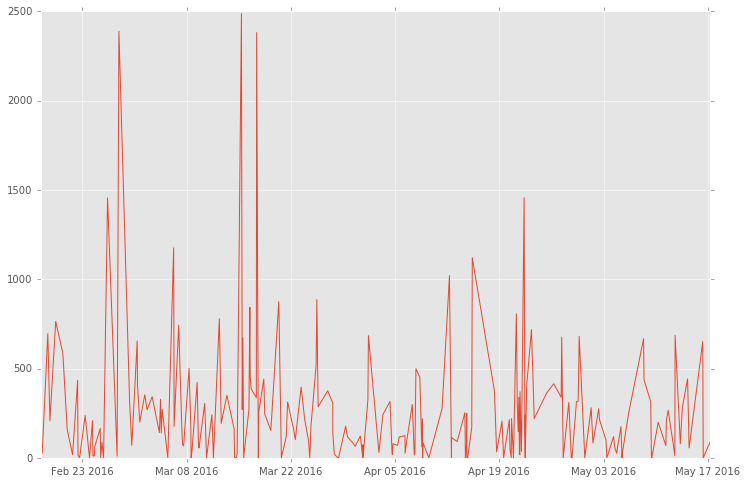

In [59]:
mibx = pd.to_datetime(mib_fb['post_published'])
miby = mib_fb['shares']
plt.plot(mibx,miby)
plt.show()

(array([ 134.,   50.,   15.,    6.,    3.,    2.,    0.,    0.,    0.,    3.]),
 array([    0. ,   248.8,   497.6,   746.4,   995.2,  1244. ,  1492.8,
         1741.6,  1990.4,  2239.2,  2488. ]),
 <a list of 10 Patch objects>)

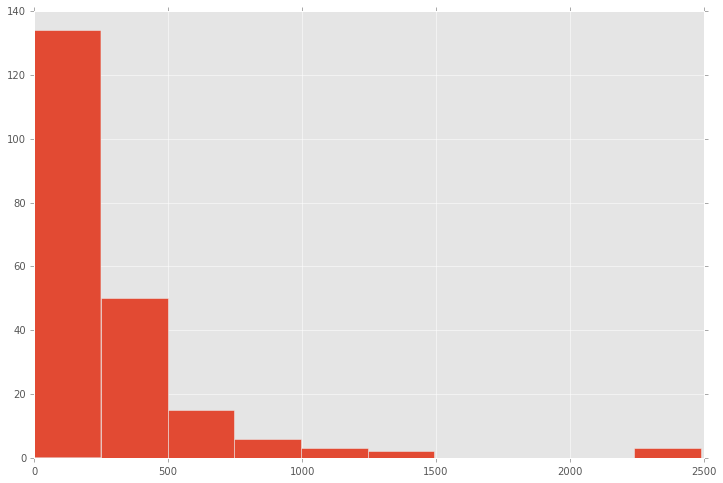

In [70]:
mib_shar = mib_fb['shares']
plt.hist(mib_shar)

# Proviamo a rimuovere gli outliers per lavorare su dati normalizzati, con valori meno distanti dalle osservazioni disponibili


In [23]:
#http://www.scriptscoop2.com/t/d1eb125cee99/python-detect-and-exclude-outliers-in-pandas-dataframe.html
mib_fb2 = pd.read_csv('https://raw.githubusercontent.com/marcogoldin/data_science/master/mibact_facebook/mibact_facebook_feb_mag_2016.csv',
                      sep=';',
                      usecols=['post_type','post_published','post_message','likes','shares','comments_all','engagement'])

In [62]:
mib_fb3 = mib_fb2.sort_values(['likes'], ascending=False)
mib_fb3.head()

,post_type,post_message,post_published,likes,comments_all,shares,engagement
51,photo,#Buongiorno dal Parco archeologico sommerso di Baia_ #Napoli. Lo straordinario valore di tali siti è dato sia dal notevole stato di conservazione dei reperti archeologici_ oltre che dal loro valore storico archeologico oggettivo. Mosaici_ tracce di affreschi_ sculture_ tracciati stradali e colonne_ sono sommersi a circa 5 metri sotto il livello del mare tra anemoni stelle marine e branchi di castagnole. Inoltre la presenza di ecosistemi sommersi di pregio come il fondale a precoralligeno e c...,2016-04-22T08:08:56+0000,2980,140,1456,4681
149,photo,#Buongiorno da Villa Lante_ Bagnaia - Viterbo. Villa Lante a Bagnaia_ frazione di Viterbo è_ assieme a Bomarzo_ uno dei più famosi giardini italiani a sorpresa manieristici del XVI secolo. Pur in mancanza di documentazione contemporanea_ la sua ideazione è attribuita a Jacopo Barozzi da Vignola. La costruzione cominciò nel 1511_ ma fu portata a termine intorno al 1566 su commissione del cardinale Gianfrancesco Gambara. La villa è conosciuta come _Villa Lante_. Tuttavia non ha acquisito que...,2016-03-15T08:58:18+0000,2744,200,2488,5638
191,photo,#Buongiorno dal Castello di San Giorgio_ #Mantova. Da piazza Castello si accede_ attraverso l_esedra_ al maniero eretto alla fine del XIV secolo dal capitano Francesco I_ trasformato da Ludovico I in abitazione marchionale. Salita la scala elicoidale detta dei Cavalli_ attraverso la Sala degli Affreschi_ dove si trovava la preziosa biblioteca dei Gonzaga_ si entra nella straordinaria Camera Picta o degli Sposi_ affrescata dal 1465 al 1474 da Andrea Mantegna. Scopri di più http://www.mantova...,2016-02-26T09:23:56+0000,2635,78,1455,4225
139,photo,#Auguri Italia! 155 anni di #UnitadItalia. L_anniversario dell_Unità d_Italia viene fatto coincidere con il 17 marzo_ data che richiama la proclamazione del Regno d_Italia (17 marzo 1861).,2016-03-17T09:54:52+0000,2604,91,2381,5258
188,photo,Congratulazioni maestro #Morricone! #Oscar #MiBACTsocial,2016-02-29T08:22:02+0000,2287,25,320,2650


# - Parte 2

In [26]:
mib_index = mib_fb.index
mib_index

RangeIndex(start=0, stop=213, step=1)

# Contiamo le tipologie di post più utilizzate

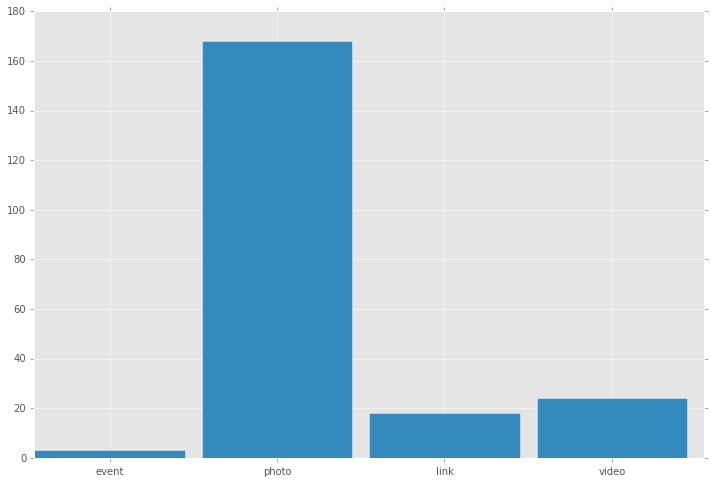

In [27]:
counter = Counter(mib_fb['post_type'])
mib_fb_ptype = counter.keys()
mib_fb_ptype_counts = counter.values()

# Plot histogram using matplotlib bar().
indexes = np.arange(len(mib_fb_ptype))
width = 0.9
plt.bar(indexes, mib_fb_ptype_counts, width)
plt.xticks(indexes + width * 0.5, mib_fb_ptype)
plt.show()



In [28]:
counter

Counter({'event': 3, 'link': 18, 'photo': 168, 'video': 24})

# - Selezioniamo le foto ['Photo']

In [29]:
mib_photo = mib_fb.loc[mib_fb['post_type']=='photo']
#mib_photo
mib_photo.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

In [30]:
mib_photo.describe()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
count,168.000000,1.680000e+02,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,105.559524,1.459554e+09,824.916667,831.083333,22.202381,21.988095,16.714286,5.273810,303.976190,18.452381,1169.333333
std,62.746396,2.205337e+06,603.264378,607.155352,25.508613,25.271694,17.817485,8.910535,395.120446,28.985193,984.054826
min,1.000000,1.455703e+09,41.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
25%,50.500000,1.457668e+09,384.500000,388.000000,7.000000,7.000000,6.000000,0.000000,75.500000,2.000000,507.750000
50%,104.000000,1.459590e+09,733.500000,742.000000,14.000000,14.000000,13.000000,2.000000,210.000000,9.000000,994.500000
75%,159.500000,1.461323e+09,1087.250000,1095.750000,29.250000,29.000000,21.250000,6.000000,344.750000,20.000000,1525.750000
max,213.000000,1.463473e+09,2980.000000,2997.000000,201.000000,200.000000,144.000000,61.000000,2488.000000,206.000000,5638.000000


In [31]:
#mib_photo.cov()

In [32]:
mib_photo.corr()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,1.000000,-0.999135,0.053500,0.055143,0.069447,0.070567,0.089366,0.021444,0.130604,0.091620,0.089749
post_published_unix,-0.999135,1.000000,-0.053371,-0.055029,-0.072850,-0.073935,-0.092364,-0.025000,-0.133333,-0.093643,-0.090912
likes,0.053500,-0.053371,1.000000,0.999989,0.677441,0.678327,0.729581,0.464974,0.779935,0.626370,0.962071
likes_count_fb,0.055143,-0.055029,0.999989,1.000000,0.677704,0.678584,0.729867,0.465132,0.780543,0.626628,0.962322
comments_count_fb,0.069447,-0.072850,0.677441,0.677704,1.000000,0.999773,0.972442,0.891022,0.722828,0.816639,0.755259
comments_all,0.070567,-0.073935,0.678327,0.678584,0.999773,1.000000,0.973536,0.889479,0.723871,0.816834,0.756233
comments_base,0.089366,-0.092364,0.729581,0.729867,0.972442,0.973536,1.000000,0.761505,0.764489,0.853961,0.804377
comments_replies,0.021444,-0.025000,0.464974,0.465132,0.891022,0.889479,0.761505,1.000000,0.524343,0.609093,0.536367
shares,0.130604,-0.133333,0.779935,0.780543,0.722828,0.723871,0.764489,0.524343,1.000000,0.732676,0.919825
comment_likes,0.091620,-0.093643,0.626370,0.626628,0.816639,0.816834,0.853961,0.609093,0.732676,1.000000,0.728607


# - Covarianza likes | shares nei 'foto-post' pubblicati

In [33]:
mib_fbphoto_likes = mib_photo['likes']
print(mib_fbphoto_likes.count(),"righe")

photolike_mean = mib_fbphoto_likes.mean()
print("media", photolike_mean)
photolike_median = mib_fbphoto_likes.median()
print("mediana", photolike_median)
photolike_std = mib_fbphoto_likes.std()
print("deviazione standard", photolike_std)

168 righe
media 824.9166666666666
mediana 733.5
deviazione standard 603.26437751755


In [34]:
mib_fbphoto_shares = mib_photo['shares']

In [35]:
mib_fbphoto_engag = mib_photo['engagement']

print(mib_fbphoto_engag.count(),"righe")

photoeng_mean = mib_fbphoto_engag.mean()
print("media =", photoeng_mean)
photoeng_median = mib_fbphoto_engag.median()
print("mediana =", photoeng_median)
photoeng_std = mib_fbphoto_engag.std()
print("deviazione standard =", photoeng_std)

168 righe
media = 1169.3333333333333
mediana = 994.5
deviazione standard = 984.054825809823


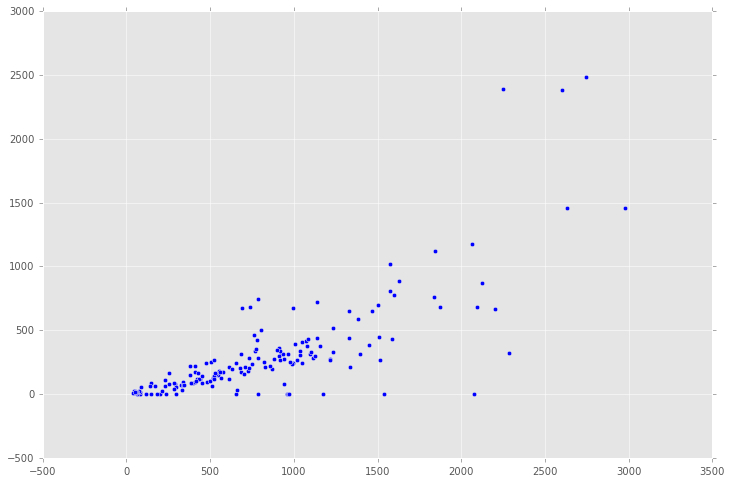

In [36]:
plt.scatter(mib_fbphoto_likes,mib_fbphoto_shares)

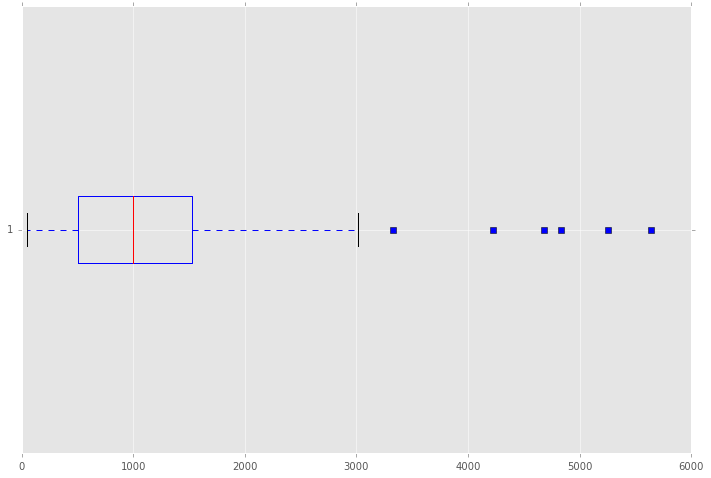

In [37]:
photoeng_boxplt = plt.boxplot(mib_fbphoto_engag, 0, 'rs', 0)

# Normalizziamo togliendo gli outliers, i valori massimi e minimi. 
# Il dataset si riduce così a 144 post (foto)

In [38]:
mib_photo_eng_norm = mib_photo.loc[mib_photo['engagement'] <= 3000]
print(type(mib_photo_eng_norm))

<class 'pandas.core.frame.DataFrame'>


In [39]:
mib_photo_eng_norm.describe()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
count,161.000000,1.610000e+02,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,103.732919,1.459620e+09,752.677019,758.335404,19.217391,19.018634,14.490683,4.527950,241.298137,14.739130,1027.732919
std,62.784229,2.207453e+06,499.394115,502.500634,17.726285,17.490880,12.061363,7.168562,227.361135,18.417221,700.931146
min,1.000000,1.455703e+09,41.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
25%,48.000000,1.457707e+09,380.000000,385.000000,7.000000,7.000000,5.000000,0.000000,69.000000,2.000000,477.000000
50%,101.000000,1.459779e+09,705.000000,709.000000,14.000000,14.000000,12.000000,2.000000,199.000000,9.000000,937.000000
75%,158.000000,1.461328e+09,1038.000000,1047.000000,27.000000,27.000000,21.000000,6.000000,326.000000,19.000000,1469.000000
max,213.000000,1.463473e+09,2287.000000,2301.000000,125.000000,121.000000,60.000000,61.000000,1121.000000,113.000000,2993.000000


In [40]:
mib_photo_eng_norm.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f46ebadaba8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f46eb95bba8>], dtype=object)

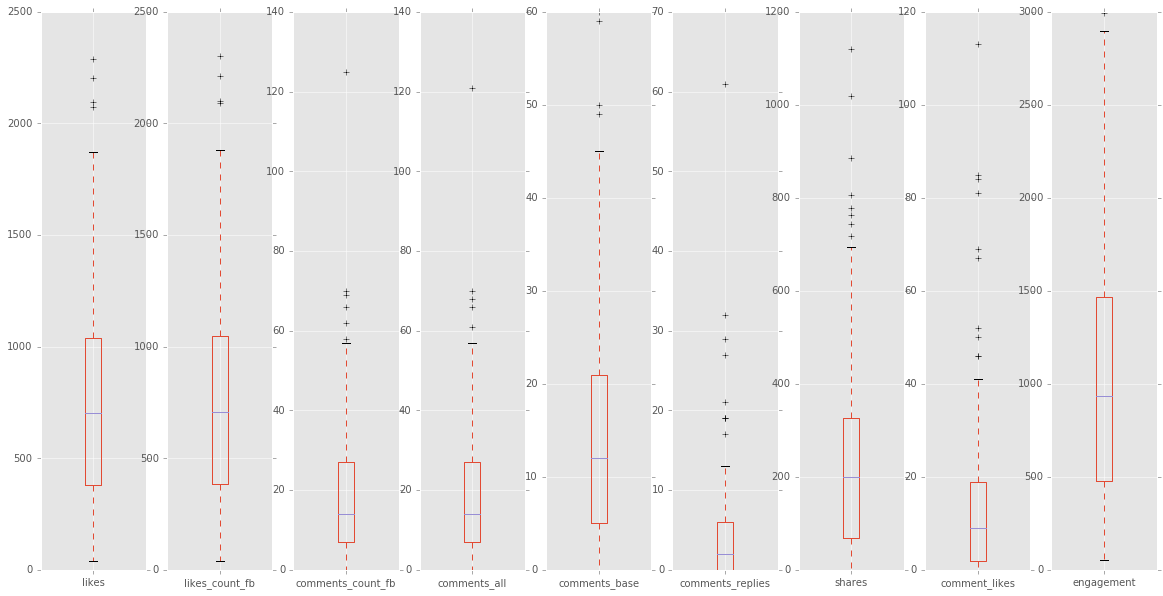

In [41]:
mib_photo_eng_norm[mib_photo_eng_norm.columns[10:]].plot(subplots=True, kind='box', figsize=(20,10))

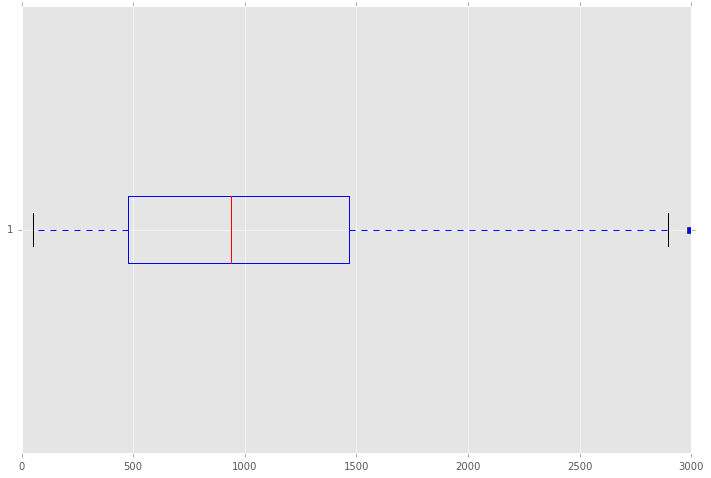

In [42]:
mib_photo_norm_engagement = mib_photo_eng_norm['engagement']
mib_photo_norm_engagement
mib_photo_norm_boxplt = plt.boxplot(mib_photo_norm_engagement, 0, 'rs', 0)


- **Esportiamo il nuovo dataframe in un file csv**

In [43]:
mib_photo_eng_norm.to_csv('photo_post_norm.csv')

- **Vediamo i valori di covarianza**

In [44]:
mib_photo_eng_norm.cov()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,3.941859e+03,-1.384739e+08,-7.137931e+02,-6.579224e+02,23.845924,24.630008,22.525621,2.104387,3.943676e+02,21.179891,-2.736155e+02
post_published_unix,-1.384739e+08,4.872848e+12,2.796981e+07,2.600433e+07,-939723.665761,-965344.741887,-851065.463432,-114279.278455,-1.459921e+07,-753076.194837,1.165217e+07
likes,-7.137931e+02,2.796981e+07,2.493945e+05,2.509420e+05,5010.476902,4956.774806,3881.909472,1074.865334,8.168296e+04,4427.565217,3.404618e+05
likes_count_fb,-6.579224e+02,2.600433e+07,2.509420e+05,2.525069e+05,5044.670380,4990.449961,3908.040644,1082.409317,8.226351e+04,4456.413043,3.426524e+05
comments_count_fb,2.384592e+01,-9.397237e+05,5.010477e+03,5.044670e+03,314.221196,309.908424,202.305163,107.603261,2.104741e+03,222.382065,7.647508e+03
comments_all,2.463001e+01,-9.653447e+05,4.956775e+03,4.990450e+03,309.908424,305.930901,200.009550,105.921351,2.079263e+03,219.692391,7.561661e+03
comments_base,2.252562e+01,-8.510655e+05,3.881909e+03,3.908041e+03,202.305163,200.009550,145.476475,54.533075,1.550953e+03,165.722554,5.798594e+03
comments_replies,2.104387e+00,-1.142793e+05,1.074865e+03,1.082409e+03,107.603261,105.921351,54.533075,51.388276,5.283104e+02,53.969837,1.763067e+03
shares,3.943676e+02,-1.459921e+07,8.168296e+04,8.226351e+04,2104.741033,2079.263160,1550.952795,528.310365,5.169309e+04,1419.634511,1.368749e+05
comment_likes,2.117989e+01,-7.530762e+05,4.427565e+03,4.456413e+03,222.382065,219.692391,165.722554,53.969837,1.419635e+03,339.194022,6.406086e+03


- **Vediamo i coefficienti di correlazione**

In [45]:
mib_photo_eng_norm.corr()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,1.000000,-0.999139,-0.022766,-0.020854,0.021426,0.022429,0.029746,0.004676,0.027627,0.018317,-0.006217
post_published_unix,-0.999139,1.000000,0.025372,0.023443,-0.024015,-0.025002,-0.031965,-0.007222,-0.029089,-0.018524,0.007531
likes,-0.022766,0.025372,1.000000,0.999985,0.566002,0.567472,0.644474,0.300247,0.719402,0.481390,0.972634
likes_count_fb,-0.020854,0.023443,0.999985,1.000000,0.566342,0.567795,0.644802,0.300485,0.720036,0.481532,0.972841
comments_count_fb,0.021426,-0.024015,0.566002,0.566342,1.000000,0.999549,0.946222,0.846790,0.522233,0.681174,0.615498
comments_all,0.022429,-0.025002,0.567472,0.567795,0.999549,1.000000,0.948075,0.844773,0.522855,0.681992,0.616780
comments_base,0.029746,-0.031965,0.644474,0.644802,0.946222,0.948075,1.000000,0.630713,0.565569,0.746038,0.685884
comments_replies,0.004676,-0.007222,0.300247,0.300485,0.846790,0.844773,0.630713,1.000000,0.324146,0.408785,0.350882
shares,0.027627,-0.029089,0.719402,0.720036,0.522233,0.522855,0.565569,0.324146,1.000000,0.339029,0.858880
comment_likes,0.018317,-0.018524,0.481390,0.481532,0.681174,0.681992,0.746038,0.408785,0.339029,1.000000,0.496242


In [46]:
mib_photo_eng_norm.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

- **l coefficiente di correlazione tra 'likes' e 'shares' è 0.599835 **
- ** I due valori non sono correlati, come si può notare dal grafico**

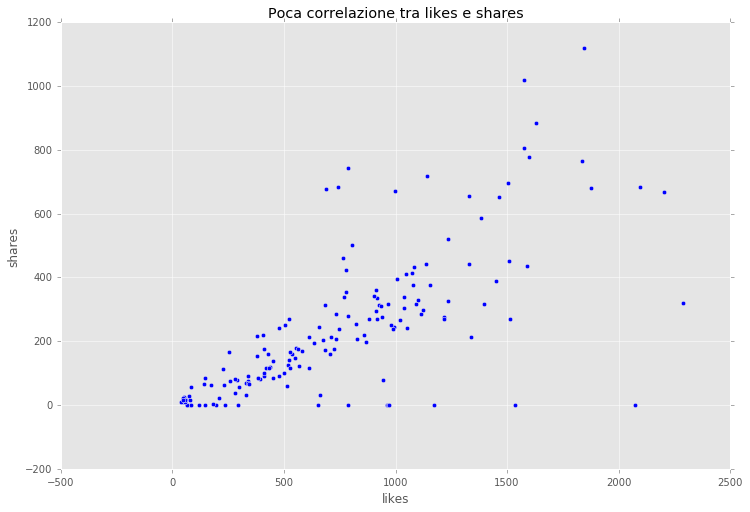

In [47]:
x_norm2 = mib_photo_eng_norm['likes']
y_norm2 = mib_photo_eng_norm['shares']
plt.scatter(x_norm2,y_norm2)

plt.xlabel('likes')
plt.ylabel('shares')
plt.title('Poca correlazione tra likes e shares')


- **E' evidente che non vale la pena di esplorare il rapporto tra i like dei post con foto e le relative condivisioni **

In [48]:
mib_photo_eng_norm.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

# L'andamento dei likes ricevuti dai post nel tempo è imprevedibile e sembra non seguire alcun pattern

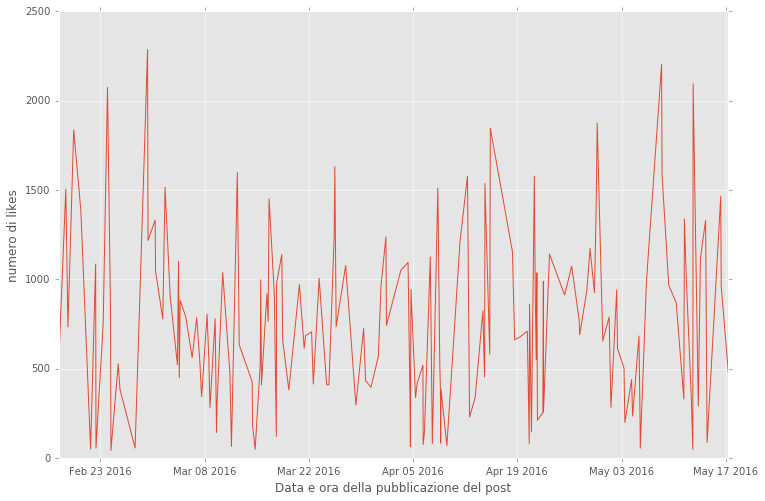

In [72]:
x = pd.to_datetime(mib_photo_eng_norm['post_published'])
y = mib_photo_eng_norm['likes']

plt.xlabel('Data e ora della pubblicazione del post')
plt.ylabel('numero di likes')

plt.plot(x,y,label='Andamento dei like in base al momento della condivisione')
plt.show()

# Linguaggio

In [50]:
mib_fb.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

In [51]:
testo = mib_fb[['post_message']]
#testo
testo.tail()

,post_message
208,#Buongiorno dal Parco Archeologico Paestum #Sa...
209,Uffizi Virtual Experience: scopri i capolavori...
210,#Buongiorno dal Museo Archeologico Nazionale e...
211,_Distruzioni saccheggi e rinascite. Gli attacc...
212,#Buongiorno dalla Pinacoteca Nazionale di Bolo...


In [52]:
testo2 = testo.iloc[:]
testo2.count()

post_message    213
dtype: int64

# - Commenti

In [53]:
# https://raw.githubusercontent.com/marcogoldin/data_science/master/mibact_facebook/mibact_facebook_feb_mag_2016_comments.csv

In [54]:
mib_comm = pd.read_csv('https://raw.githubusercontent.com/marcogoldin/data_science/master/mibact_facebook/mibact_facebook_feb_mag_2016_comments.csv',
                       sep=';')

In [55]:
mib_comm.describe()

,is_reply,comment_like_count
count,4380.000000,4380.000000
mean,0.228767,0.963699
std,0.420087,2.481042
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,67.000000


In [56]:
mib_comm.columns

Index(['﻿position', 'post_id', 'post_by', 'post_text', 'post_published',
       'comment_id', 'comment_by', 'is_reply', 'comment_message',
       'comment_published', 'comment_like_count'],
      dtype='object')

In [57]:
mib_comm_repl = DataFrame(mib_comm,columns=['post_text','comment_message','comment_id'])
mib_comm_repl.count()
#mib_comm_repl

post_text          4380
comment_message    4249
comment_id         4380
dtype: int64

# intervallo... 
# camperisti

In [58]:
pd.options.display.max_colwidth = 500
mib_comm_camper = mib_comm_repl[mib_comm_repl['comment_id']=='10154223947508711_10154224070838711']
mib_comm_camper

,post_text,comment_message,comment_id
25,#Buongiorno dall_antica città di Elea-Velia #Salerno L’antica città di Elea_ che deriva il suo nome dalla sorgente locale Hyele_ fu fondata intorno al 540 a.C. da un gruppo di esuli provenienti dalla città greca di Focea_ nell’attuale Turchia_ occupata dai Persiani. La città_ nota nel V sec. soprattutto per le figure di Parmenide e Zenone_ fondatori della scuola filosofica eleatica_ raggiunge un periodo di grande sviluppo in età ellenistica e in gran parte dell’età romana (fine IV a.C. – V s...,"Grazie a voi , che avete pubblicato questo post qualche mese fa, ho potuto conoscere questo sito molto bello ed interessante che non conoscevo ed ho organizzato un raduno di camperisti, il 25 aprile eravamo li in 48 persone .",10154223947508711_10154224070838711
